In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import numpy as np

import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from tree_encoder import JakowskiEncoder
from utils import load_data

<h1> Linear Encoder </h1>

Testo l'encoder che convrte un tree in matrice e viceversa.

In [2]:
dataset = "iris"
depth = 4

X_train, X_val, X_test, y_train, y_val, y_test = load_data(dataset)

n_features_in = X_train.shape[1]
n_classes = len(np.unique(y_train))

print("X_train: {}".format(X_train.shape))
print("X_val: {}".format(X_val.shape))
print("X_test: {}".format(X_test.shape))
print()
print("y_train: {}".format(y_train.shape))
print("y_val: {}".format(y_val.shape))
print("y_test: {}".format(y_test.shape))

X_train: (120, 4)
X_val: (15, 4)
X_test: (15, 4)

y_train: (120,)
y_val: (15,)
y_test: (15,)


In [3]:
clf = DecisionTreeClassifier(max_depth=depth)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
val_acc = accuracy_score(y_test, y_pred)

print("Accuracy: {}".format(val_acc))

Accuracy: 1.0


In [4]:
children_left = len([x for x in clf.tree_.children_left if x != -1])
children_right = len([x for x in clf.tree_.children_right if x != -1])

children_left + children_right + 1

13

[Text(0.4, 0.9, 'X[3] <= 0.292\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.5, 0.7, 'X[2] <= 0.675\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]'),
 Text(0.2, 0.5, 'X[3] <= 0.667\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.3, 0.3, 'X[1] <= 0.458\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'X[3] <= 0.688\ngini = 0.133\nsamples = 42\nvalue = [0, 3, 39]'),
 Text(0.7, 0.3, 'X[2] <= 0.711\ngini = 0.5\nsamples = 6\nvalue = [0, 3, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 36]')]

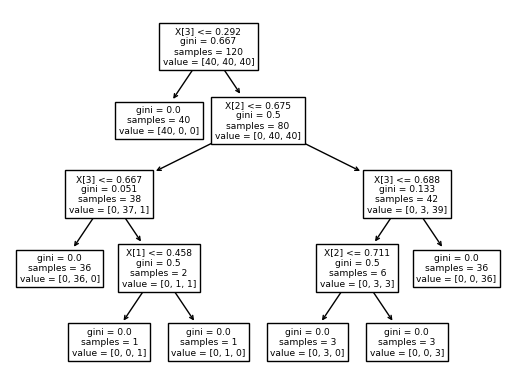

In [5]:
tree.plot_tree(clf)

In [6]:
str(clf.tree_.__getstate__())

"{'max_depth': 4, 'node_count': 13, 'nodes': array([( 1,  2,  3,  0.29166666, 0.66666667, 120, 120.),\n       (-1, -1, -2, -2.        , 0.        ,  40,  40.),\n       ( 3,  8,  2,  0.67543861, 0.5       ,  80,  80.),\n       ( 4,  5,  3,  0.66666666, 0.05124654,  38,  38.),\n       (-1, -1, -2, -2.        , 0.        ,  36,  36.),\n       ( 6,  7,  1,  0.45833333, 0.5       ,   2,   2.),\n       (-1, -1, -2, -2.        , 0.        ,   1,   1.),\n       (-1, -1, -2, -2.        , 0.        ,   1,   1.),\n       ( 9, 12,  3,  0.6875    , 0.13265306,  42,  42.),\n       (10, 11,  2,  0.71052632, 0.5       ,   6,   6.),\n       (-1, -1, -2, -2.        , 0.        ,   3,   3.),\n       (-1, -1, -2, -2.        , 0.        ,   3,   3.),\n       (-1, -1, -2, -2.        , 0.        ,  36,  36.)],\n      dtype=[('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')]), 'values': ar

In [7]:
encoder = JakowskiEncoder(n_features=n_features_in, n_classes=n_classes)

<h2> Encoder </h2>

<p><b>Riga 0</b></p>
<ul>
    <li> Valore positivo -> feature number
    <li> -1 -> leaf
</ul>
<p><b>Riga 1</b></p>
<ul>
    <li> Valore reale (< 1) -> threshold
    <li> Valore intero (>= 1) -> classe
</ul>

In [8]:
vec = encoder.encode(clf, depth)
vec

array([[ 4.        ,  4.        ,  3.        ,  4.        ,  4.        ,
         4.        ,  4.        ,  4.        ,  4.        ,  4.        ,
         4.        ,  4.        ,  2.        ,  3.        ,  4.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        ],
       [ 0.29166666,  0.29166666,  0.67543861,  0.29166666,  0.29166666,
         0.66666666,  0.6875    ,  0.29166666,  0.29166666,  0.29166666,
         0.29166666,  0.66666666,  0.45833333,  0.71052632,  0.6875    ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  2.        ,  2.        ,
         3.        ,  2.        ,  2.        ,  3.        ,  3.        ,
         3.        ]])

In [9]:
vec.shape[1]

31

<h3> is_tree() </h3>

In [10]:
# Check if the linear representation is a Tree

encoder.is_tree(vec)

True

In [11]:
app = vec[0][0]
vec[0][0] = -1

encoder.is_tree(vec)

False

In [12]:
vec[0][0] = app

<h2> Decoder </h2>

In [13]:
clf2 = encoder.decode(vec)
clf2

DecisionTreeClassifier()

In [14]:
y_pred = clf2.predict(X_test)
val_acc = accuracy_score(y_test, y_pred)

print("Accuracy: {}".format(val_acc))

Accuracy: 1.0


[Text(0.4, 0.9, 'X[3] <= 0.292\ngini = 0.625\nsamples = 16\nvalue = [8, 4, 4]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0]'),
 Text(0.5, 0.7, 'X[2] <= 0.675\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.2, 0.5, 'X[3] <= 0.667\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.3, 0.3, 'X[1] <= 0.458\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'X[3] <= 0.688\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.7, 0.3, 'X[2] <= 0.711\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]')]

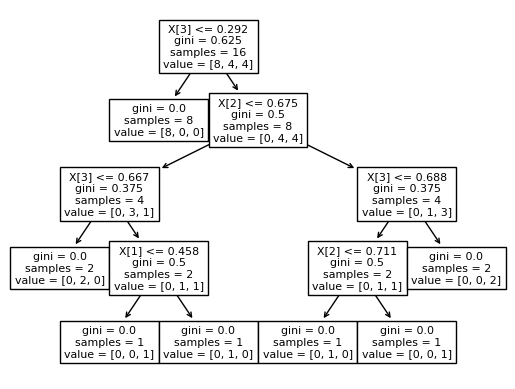

In [15]:
tree.plot_tree(clf2)

In [16]:
clf2.tree_.__getstate__()

{'max_depth': 4,
 'node_count': 13,
 'nodes': array([( 1,  2,  3,  0.29166666, 0.625, 16, 16.),
        (-1, -1, -2, -2.        , 0.   ,  8,  8.),
        ( 3,  8,  2,  0.67543861, 0.5  ,  8,  8.),
        ( 4,  5,  3,  0.66666666, 0.375,  4,  4.),
        (-1, -1, -2, -2.        , 0.   ,  2,  2.),
        ( 6,  7,  1,  0.45833333, 0.5  ,  2,  2.),
        (-1, -1, -2, -2.        , 0.   ,  1,  1.),
        (-1, -1, -2, -2.        , 0.   ,  1,  1.),
        ( 9, 12,  3,  0.6875    , 0.375,  4,  4.),
        (10, 11,  2,  0.71052632, 0.5  ,  2,  2.),
        (-1, -1, -2, -2.        , 0.   ,  1,  1.),
        (-1, -1, -2, -2.        , 0.   ,  1,  1.),
        (-1, -1, -2, -2.        , 0.   ,  2,  2.)],
       dtype=[('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')]),
 'values': array([[[8., 4., 4.]],
 
        [[8., 0., 0.]],
 
        [[0., 4., 4.]],
 
        [[0., 